In [1]:
import os
import sys
PACKAGE_PATH = '/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.6/site-packages'
if not PACKAGE_PATH in sys.path:
    sys.path.append(PACKAGE_PATH)

In [2]:
import import_ipynb
import numpy as np
from PIL import Image

from data import downloadData as dd
from models import cnnModel as cn
from services import modelService

importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/data/downloadData.ipynb
importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/models/cnnModel.ipynb
importing Jupyter notebook from /home/ec2-user/SageMaker/CnnMathematicalFunctions/services/modelService.ipynb


In [7]:
class MathematicalFunctionsCNN:

    train_dir = 'data/train'
    test_dir = 'data/test'
    val_dir = 'data/val'
    model = ''
    model_path = 'results/cnn.h5'

    def __main__(self):
        ms = modelService.modelService()
        # ms.resetState()
        #if len(os.listdir('data')) < 4:
        #    dd.importImages()
        #    dd.applyDataAugmentation(self.train_dir, 90)
        if os.path.isfile(self.model_path):
            self.model = ms.loadModel(self.model_path)
            self.model.summary()
        #else:     
        #ms.createRandomLinearFunctions(50, 'test')
        #ms.createRandomSquaredFunctions(50, 'test')
        self.model = cn.create_Model()
        self.model.summary()
        cn.fit_model(self.model, self.train_dir, self.val_dir)
        test_images = ms.get_random_test_images(self.test_dir, 3)
        cn.predict_images(test_images, self.model)
        ms.saveModel(self.model, self.model_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
__________________________________________

Using TensorFlow backend.


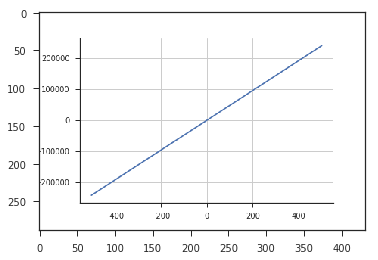

This mathematical function is linear [0.]


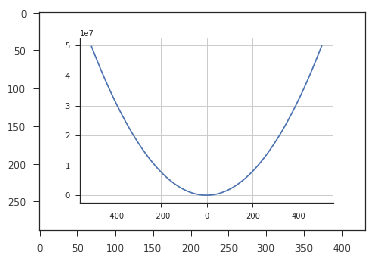

This mathematical function is squared [1.]


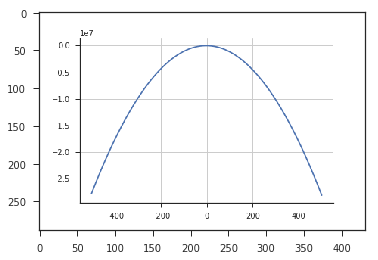

This mathematical function is squared [1.]


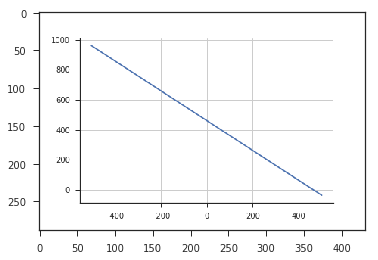

This mathematical function is linear [0.]


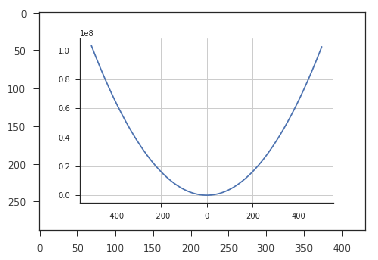

This mathematical function is squared [1.]


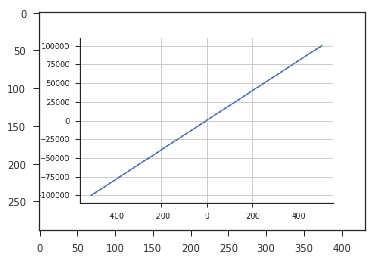

This mathematical function is linear [0.]


In [8]:
model = MathematicalFunctionsCNN()
model.__main__()